In [35]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import easyocr

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_11632\2345956932.py:3: SyntaxWarning: invalid escape sequence '\c'
  'Combate2': '..\\FFVI\\Combat\combate2.jpg',
C:\Users\cdsim\AppData\Local\Temp\ipykernel_11632\2345956932.py:4: SyntaxWarning: invalid escape sequence '\c'
  'Combate3': '..\\FFVI\\Combat\combate3.jpg',


Text(0.5, 1.0, 'Imagem Original')

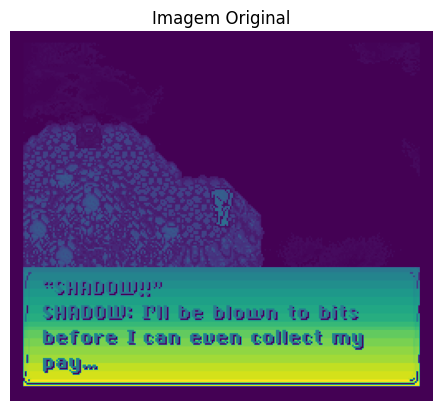

In [36]:
dicionario = {
    'Combate': '..\\FFVI\\Dialog\\texto_baixo.png',
    'Combate2': '..\\FFVI\\Combat\combate2.jpg',
    'Combate3': '..\\FFVI\\Combat\combate3.jpg',
}

escolha = 'Combate' 
original_image = Image.open(dicionario[escolha])
cv2_img = np.array(original_image)
plt.imshow(cv2_img)
plt.axis('off')
plt.title('Imagem Original')

Text(0.5, 1.0, 'Cropped Image')

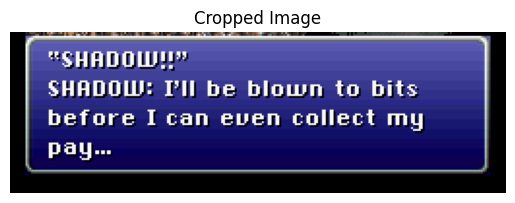

In [47]:
# Get the dimensions of the original image
width, height = original_image.size

# Define the coordinates for the bottom part of the image
left = 0
top = int(height * 0.63)
right = width
bottom = height
# Crop the image
cropped_image = original_image.crop((left, top, right, bottom))

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')
plt.title('Cropped Image')


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carregar a imagem usando PIL
cropped_image = Image.open('imagem.jpg')  # Substitua 'imagem.jpg' pelo caminho da sua imagem

# Converter a imagem PIL para uma matriz numpy
cropped_image_np = np.array(cropped_image)

# Verificar o número de canais na imagem de entrada
if len(cropped_image_np.shape) == 2:
    # Se a imagem tiver apenas um canal (escala de cinza), convertê-la para uma imagem de três canais (RGB)
    cropped_image_np = cv2.cvtColor(cropped_image_np, cv2.COLOR_GRAY2RGB)

# Converter a imagem para o espaço de cores HSV
hsv_image = cv2.cvtColor(cropped_image_np, cv2.COLOR_RGB2HSV)

# Definir os valores de matiz azul inferior e superior
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Criar uma máscara para filtrar pixels não azuis
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Contar o número de pixels azuis
blue_pixel_count = np.count_nonzero(blue_mask)

# Calcular a porcentagem de pixels azuis
blue_pixel_percentage = (blue_pixel_count / (cropped_image_np.shape[0] * cropped_image_np.shape[1])) * 100

# Verificar se a imagem é predominantemente azul
if blue_pixel_percentage > 75:
    print("A imagem é predominantemente azul")
else:
    print("A imagem não é predominantemente azul")

# Exibir a máscara azul
plt.imshow(blue_mask, cmap='gray')
plt.axis('off')
plt.title('Máscara Azul')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cdsim\\OneDrive\\Área de Trabalho\\ProjetoPraCV\\Projeto-CV\\scripts\\imagem.jpg'

In [ ]:
#clear the file used to tstore the text
with open('..\\FFVI\\results\\Combat\\saida_texto.txt', 'w') as f:
    f.write('')

reader = easyocr.Reader(['en'])
#transform cropped image to np array
cropped_cv2 = np.array(cropped_image)
result = reader.readtext(cropped_cv2, allowlist='ABCDEFGHIJKLMNOPQRSUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-,.?!@#$%')

for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')
    # Display the text and the bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(cropped_cv2, top_left, bottom_right, (0, 255, 0), 5)
    cv2.putText(cropped_cv2, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # write every text in a file, but before+-
    with open('..\\FFVI\\results\\Combat\\saida_texto.txt', 'a') as f:
        f.write(text + '\n')

# Display the image with the detected text
plt.imshow(cropped_cv2)
plt.axis('off')
plt.title('Detected Text')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '..\\FFVI\\results\\Combat\\saida_texto.txt'